# Exploratory Data Analysis in Python

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# change the default console output settings in NumPy and pandas to improve readability
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
np.set_printoptions(precision=4, suppress=True)

# Import datasets
unemployment = pd.read_csv("datasets/clean_unemployment.csv")

planes = pd.read_csv("datasets/planes.csv")
# Convert "Date_of_Journey" column to datetime data
planes["Date_of_Journey"] = pd.to_datetime(planes["Date_of_Journey"], format="%d/%m/%Y")

salaries = pd.read_csv("datasets/ds_salaries_rupees.csv")
divorce = pd.read_csv("datasets/divorce.csv")

## 1. Getting to Know a Dataset

### Initial exploration

#### _Functions for initial exploration_

In [2]:
# Print the first five rows of 'unemployment' 
unemployment.head()

,country_code,country_name,continent,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AFG,Afghanistan,Asia,11.35,11.05,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
1,AGO,Angola,Africa,9.43,7.36,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
2,ALB,Albania,Europe,14.09,13.48,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82
3,ARE,United Arab Emirates,Asia,2.48,2.30,2.18,2.04,1.91,1.77,1.64,2.46,2.35,2.23,3.19,3.36
4,ARG,Argentina,South America,7.71,7.18,7.22,7.10,7.27,7.52,8.11,8.35,9.22,9.84,11.46,10.90


In [3]:
# Print a summary of non-missing values and data types
unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  182 non-null    object 
 1   country_name  182 non-null    object 
 2   continent     177 non-null    object 
 3   2010          182 non-null    float64
 4   2011          182 non-null    float64
 5   2012          182 non-null    float64
 6   2013          182 non-null    float64
 7   2014          182 non-null    float64
 8   2015          182 non-null    float64
 9   2016          182 non-null    float64
 10  2017          182 non-null    float64
 11  2018          182 non-null    float64
 12  2019          182 non-null    float64
 13  2020          182 non-null    float64
 14  2021          182 non-null    float64
dtypes: float64(12), object(3)
memory usage: 21.5+ KB


In [4]:
# Print summary statistics for numerical columns
unemployment.describe()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,8.409286,8.315440,8.317967,8.344780,8.179670,8.058901,7.925879,7.668626,7.426429,7.243736,8.420934,8.390879
std,6.248887,6.266795,6.367270,6.416041,6.284241,6.161170,6.045439,5.902152,5.818915,5.696573,6.040915,6.067192
min,0.450000,0.320000,0.480000,0.250000,0.200000,0.170000,0.150000,0.140000,0.110000,0.100000,0.210000,0.260000
25%,4.015000,3.775000,3.742500,3.692500,3.625000,3.662500,3.800000,3.690000,3.625000,3.487500,4.285000,4.335000
50%,6.965000,6.805000,6.690000,6.395000,6.450000,6.170000,5.925000,5.650000,5.375000,5.240000,6.695000,6.425000
75%,10.957500,11.045000,11.285000,11.310000,10.695000,10.215000,10.245000,10.315000,9.257500,9.445000,11.155000,10.840000
max,32.020000,31.380000,31.020000,29.000000,28.030000,27.690000,26.540000,27.040000,26.910000,28.470000,29.220000,33.560000


#### _Counting categorical values_

In [5]:
# Count the values associated with each continent
unemployment.value_counts("continent")

continent
Africa           53
Asia             47
Europe           39
North America    18
South America    12
Oceania           8
Name: count, dtype: int64

#### _Global unemployment in 2021_

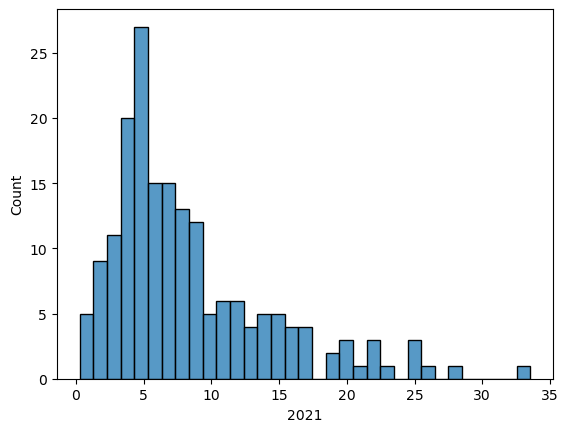

In [6]:
''' Create a histogram of the distribution of 2021 unemployment percentages across all  
countries in "unemployment"; show a full percentage point in each bin.
'''

sns.histplot(data=unemployment, x="2021", binwidth=1.0)
plt.show()

### Data validation

#### _Detecting data types_

In [7]:
# Change the data type of the 2019 column to an integer
unemployment["2019"] = unemployment["2019"].astype(int)
unemployment.dtypes

country_code     object
country_name     object
continent        object
2010            float64
2011            float64
2012            float64
2013            float64
2014            float64
2015            float64
2016            float64
2017            float64
2018            float64
2019              int32
2020            float64
2021            float64
dtype: object

In [8]:
# Change the data type of the 2019 column back to a float
unemployment["2019"] = unemployment["2019"].astype(float)
unemployment.dtypes

country_code     object
country_name     object
continent        object
2010            float64
2011            float64
2012            float64
2013            float64
2014            float64
2015            float64
2016            float64
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
dtype: object

#### _Validating continents_

In [9]:
# Define a Series describing whether each continent is outside of Oceania
not_oceania = ~unemployment["continent"].isin(["Oceania"])

# Create a DataFrame without records related to countries in Oceania
df = unemployment[not_oceania]
df.value_counts("continent")


continent
Africa           53
Asia             47
Europe           39
North America    18
South America    12
Name: count, dtype: int64

#### _Validating range_

In [10]:
# Print the minimum and maximum employment rates during 2021
print(unemployment["2021"].min(), unemployment["2021"].max())

0.26 33.56


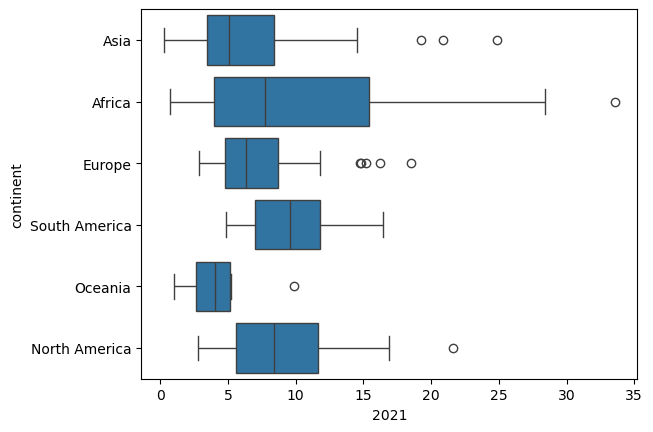

In [11]:
# Create a boxplot of 2021 unemployment rates, broken down by continent
sns.boxplot(data=unemployment, x="2021", y="continent")
plt.show()

### Data summarization

#### _Summaries with .groupby() and .agg()_

In [12]:
# Print the mean and standard deviation of the unemployment rates for each year
unemployment.select_dtypes(include='float64').agg(["mean", "std"])

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
mean,8.409286,8.315440,8.317967,8.344780,8.179670,8.058901,7.925879,7.668626,7.426429,6.758242,8.420934,8.390879
std,6.248887,6.266795,6.367270,6.416041,6.284241,6.161170,6.045439,5.902152,5.818915,5.677990,6.040915,6.067192


In [13]:
''' Print the mean and standard deviation of the unemployment rates for each year,  
grouped by continent. '''

# Select only numeric columns for aggregation
numeric_columns = unemployment.select_dtypes("float64").columns

unemployment.groupby("continent")[numeric_columns].agg(["mean", "std"])

2010                 2011                 2012            \
                    mean       std       mean       std       mean       std   
continent                                                                      
Africa          9.343585  7.411259   9.369245  7.401556   9.240755  7.264542   
Asia            6.240638  5.146175   5.942128  4.779575   5.835319  4.756904   
Europe         11.008205  6.392063  10.947949  6.539538  11.325641  7.003527   
North America   8.663333  5.115805   8.563333  5.377041   8.448889  5.495819   
Oceania         3.622500  2.054721   3.647500  2.008466   4.103750  2.723118   
South America   6.870833  2.807058   6.518333  2.801577   6.410833  2.936508   

                    2013                 2014            ...      2017  \
                    mean       std       mean       std  ...      mean   
continent                                                ...             
Africa          9.132453  7.309285   9.121321  7.291359  ...  9.284528   
Asia            5.852128  4.668405   5.853191  4.681301  ...  6.171277   
Europe         11.466667  6.969209  10.971282  6.759765  ...  8.359744   
North America   8.840556  6.081829   8.512222  5.801927  ...  7.391111   
Oceania         3.980000  2.640119   3.976250  2.659205  ...  3.872500   
South America   6.335000  2.808780   6.347500  2.834332  ...  7.281667   

                             2018                2019                 2020  \
                    std      mean       std      mean       std       mean   
continent                                                                    
Africa         7.407620  9.237925  7.358425  8.773585  7.417862  10.307736   
Asia           5.277201  6.090213  5.409128  5.468085  5.233052   7.012340   
Europe         5.177845  7.427436  4.738206  6.333333  4.157006   7.470513   
North America  5.326446  7.281111  5.253180  6.611111  4.803661   9.297778   
Oceania        2.492834  3.851250  2.455893  3.375000  2.503569   4.273750   
South America  3.398994  7.496667  3.408856  7.083333  3.232177  10.275000   

                              2021            
                    std       mean       std  
continent                                     
Africa         7.928166  10.473585  8.131636  
Asia           5.699609   6.906170  5.414745  
Europe         4.071218   7.414872  3.947825  
North America  4.963045   9.155000  5.076482  
Oceania        2.617490   4.280000  2.671522  
South America  3.411263   9.924167  3.611624  

[6 rows x 24 columns]

#### _Named aggregations_

In [14]:
''' Create a DataFrame which shows a row for each continent. The DataFrame columns will  
contain the mean and standard deviation of the unemployment rate for each continent in  
2021. Rename the columns so that their contents are clear. '''

continent_summary = unemployment.groupby("continent")\
    .agg(mean_rate_2021=("2021", "mean"),
         std_rate_2021=("2021", "std"))

print(continent_summary)

               mean_rate_2021  std_rate_2021
continent                                   
Africa              10.473585       8.131636
Asia                 6.906170       5.414745
Europe               7.414872       3.947825
North America        9.155000       5.076482
Oceania              4.280000       2.671522
South America        9.924167       3.611624


#### _Visualizing categorical summaries_

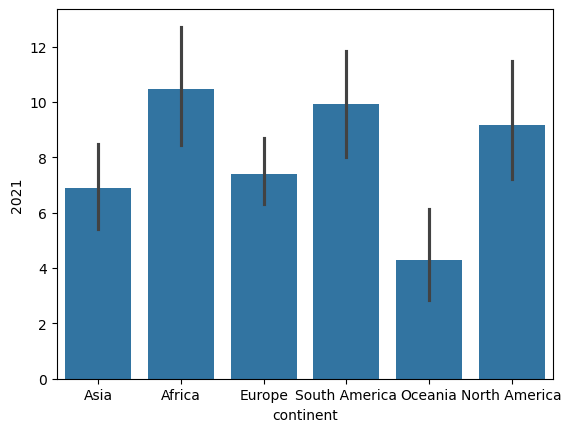

In [15]:
''' Create a bar plot to visualize the means and confidence intervals of unemployment  
rates across the different continents in 2021. '''

sns.barplot(data=unemployment, x="continent", y="2021")
plt.show()

**Note:** While Europe has higher average unemployment than Asia, it also has a smaller  

confidence interval for that average (as shown by the length of the black vertical lines), so
  
the average value is more reliable.

## 2. Data Cleaning and Imputation

### Addressing missing data

#### _Dealing with missing data_

One approach is to drop missing values if they account for a small proportion, typically  
five percent, of the data.

In [16]:
''' Working with a dataset on plane ticket prices, called "planes", count the number  
of missing values across all columns, calculate five percent of all values, use this  
threshold to remove observations, and check how many missing values remain in the dataset'''

# Count the number of missing values in each column
planes.isna().sum()

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64

In [17]:
# Find the five percent threshold
threshold = len(planes) * 0.05

# Create a filter
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]

# Drop missing values for columns below the threshold
planes.dropna(subset=cols_to_drop, inplace=True)

planes.isna().sum()

Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64

#### _Strategies for remaining missing data_

In [18]:
# Check the values of the "Additional_Info" column
planes["Additional_Info"].value_counts()

Additional_Info
No info                         6399
In-flight meal not included     1525
No check-in baggage included     258
1 Long layover                    14
Change airports                    7
No Info                            2
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

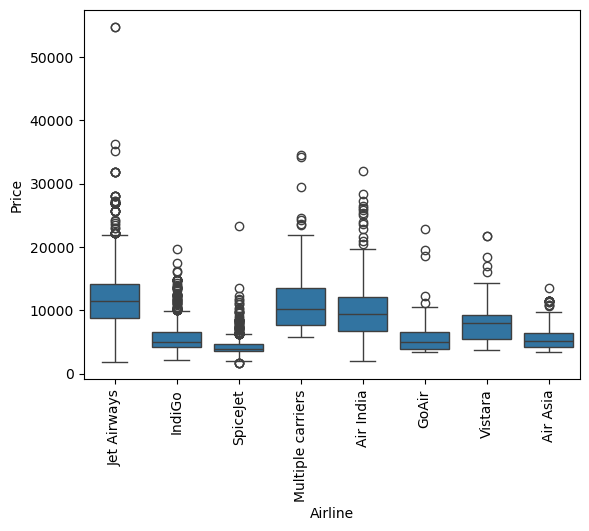

In [19]:
# Create a boxplot of Price by Airline
sns.boxplot(data=planes, x="Airline", y="Price")
plt.xticks(rotation=90)
plt.show()

**Question:** How should you deal with the missing values in "Additional_Info" and "Price"?

* Remove the "Additional_Info" column as it is not required and impute the median by "Airline"   
for missing values of "Price".

In [20]:
# Remove the "Additional_Info" column
planes = planes.drop("Additional_Info", axis=1)

#### _Imputing missing plane prices_

In [21]:
''' Impute the missing data in the "Price" column of the dataset.'''

# Calculate median plane ticket prices by Airline
airline_prices = planes.groupby("Airline")["Price"].median()
print(airline_prices)

Airline
Air Asia              5192.0
Air India             9443.0
GoAir                 5003.5
IndiGo                5054.0
Jet Airways          11507.0
Multiple carriers    10197.0
SpiceJet              3873.0
Vistara               8028.0
Name: Price, dtype: float64


In [22]:
# Convert the grouped median prices to a dictionary
prices_dict = airline_prices.to_dict()

# Map the dictionary to missing values of 'Price' by 'Airline' 
planes["Price"] = planes["Price"].fillna(planes["Airline"].map(prices_dict))

# Check for missing values
planes.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64

### Converting and analyzing categorical data

#### _Finding the number of unique values_

In [23]:
''' Find out which non-numeric columns in the "planes" dataset have a large number of  
unique values.'''

# Filter the DataFrame for object columns
non_numeric = planes.select_dtypes(include=["object"])

# Loop through the columns
for col in non_numeric.columns:
    # Print the number of unique values
    print(f"Number of unique values in {col} column: ", non_numeric[col].nunique())

Number of unique values in Airline column:  8
Number of unique values in Source column:  5
Number of unique values in Destination column:  6
Number of unique values in Route column:  122
Number of unique values in Dep_Time column:  218
Number of unique values in Arrival_Time column:  1220
Number of unique values in Duration column:  362
Number of unique values in Total_Stops column:  5


#### _Flight duration categories_

In [24]:
# Examine the "Duration" column
planes["Duration"].head()

0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object

In [25]:
''' To create a "Duration_Category" column in the "planes" DataFrame, first create a  
list of the values you would like to insert into the DataFrame, followed by the existing  
values that these should be created from. '''

# Create a list of categories
flight_categories = ["Short-haul", "Medium", "Long-haul"]

# Create a string to capture any values between 0 and 4 hours
# The ^ symbol is used to find a match at the start of the line
short_flights = "^0h|^1h|^2h|^3h|^4h"

# Create a string to capture any values between 5 and 9 hours
medium_flights = "^5h|^6h|^7h|^8h|^9h"

# Create a string to capture any values between 10 to 16 hours
long_flights = "^10h|^11h|^12h|^13h|^14h|^15h|^16h"

#### _Adding duration categories_

In [26]:
''' Build a new column to analyze the frequency of flights by duration. ''' 

''' First, create "conditions", a list containing subsets of planes["Duration"] based on   
the strings, short_flights, medium_flights, and long_flights. '''

conditions = [
    (planes["Duration"].str.contains(short_flights)),
    (planes["Duration"].str.contains(medium_flights)),
    (planes["Duration"].str.contains(long_flights))
]

In [27]:
''' Create the "Duration_Category" column by calling a function that accepts the  
"conditions" list and "flight_categories", setting values not found to "Extreme duration" '''

planes["Duration_Category"] = np.select(conditions, 
                                        flight_categories,
                                        default="Extreme duration")

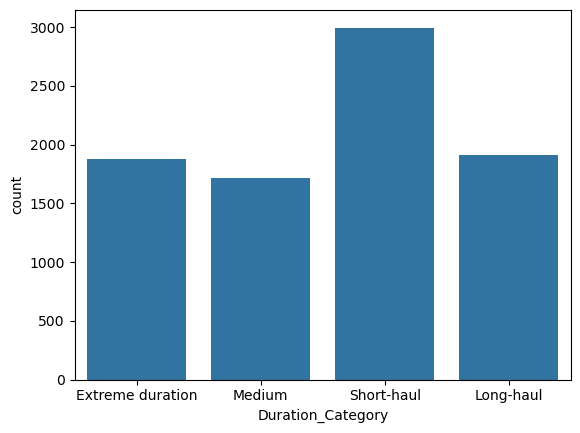

In [28]:
# Plot the count of each category
sns.countplot(data=planes, x="Duration_Category")
plt.show()

### Working with numeric data

#### _Changing data type_

In [29]:
''' Add a new column with salaries in USD. '''

# Preview the column
salaries["Salary_In_Rupees"].head()

0     6,352,272.00
1    20,688,070.00
2     8,674,985.00
3     1,591,390.00
4    11,935,425.00
Name: Salary_In_Rupees, dtype: object

In [30]:
# Remove the string character
salaries["Salary_In_Rupees"] = salaries["Salary_In_Rupees"].str.replace(",", "")
salaries["Salary_In_Rupees"].head()

0     6352272.00
1    20688070.00
2     8674985.00
3     1591390.00
4    11935425.00
Name: Salary_In_Rupees, dtype: object

In [31]:
# Convert the column to a float data type
salaries["Salary_In_Rupees"] = salaries["Salary_In_Rupees"].astype(float)

# Add a new USD column
salaries["Salary_USD"] = salaries["Salary_In_Rupees"] * 0.012

# Preview the new column
salaries[["Salary_In_Rupees", "Salary_USD"]].head()

,Salary_In_Rupees,Salary_USD
0,6352272.0,76227.264
1,20688070.0,248256.840
2,8674985.0,104099.820
3,1591390.0,19096.680
4,11935425.0,143225.100


#### _Adding descriptive statistics_

In [32]:
''' Add a column containing the standard deviation of "Salary_USD" where values are   
conditional based on the "Experience" column. '''

salaries["std_dev"] = salaries.groupby("Experience")["Salary_USD"]\
    .transform(lambda x: x.std())

In [33]:
''' Add a column for the median salary based on company size. '''

salaries["median_by_comp_size"] = salaries.groupby("Company_Size")["Salary_USD"]\
    .transform(lambda x: x.median())

### Handling outliers

#### _Identifying outliers_

Histograms, boxplots, and descriptive statistics are useful methods for identifying  
extreme values.

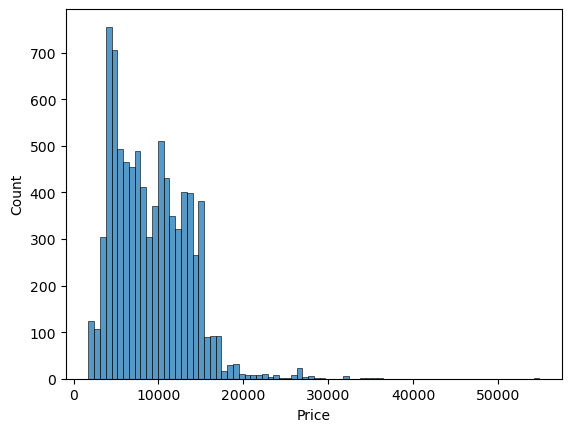

In [34]:
''' Check for outliers in the "Price" column of the "planes" DataFrame. '''

# Plot a histogram of flight prices
sns.histplot(data=planes, x="Price")
plt.show()

The data is right-skewed indicating we have upper outliers in our data.

In [35]:
# Display descriptive statistics for flight prices
planes["Price"].describe()

count     8508.000000
mean      9033.468441
std       4366.382574
min       1759.000000
25%       5228.000000
50%       8452.000000
75%      12242.000000
max      54826.000000
Name: Price, dtype: float64

The maximum flight price seems extreme as it is more than six times the mean and median.

#### _Removing outliers_

In [36]:
''' It has been decided to only include flights where the "Price" is not an outlier.  
Find the upper threshold and then use it to remove values above this from the "planes"  
DataFrame. '''

# Find the 75th and 25th percentiles
price_upper_perc = planes["Price"].quantile(0.75)
price_lower_perc = planes["Price"].quantile(0.25)

# Calculate inter quartile range (IQR)
prices_iqr = price_upper_perc - price_lower_perc

# Calculate the upper and lower outlier thresholds
upper = price_upper_perc + (1.5 * prices_iqr)
lower = price_lower_perc - (1.5 * prices_iqr)

# Remove the outliers from "planes"
planes = planes[(planes["Price"] > lower) & (planes["Price"] < upper)]

planes["Price"].describe()

count     8438.000000
mean      8877.466046
std       4001.838236
min       1759.000000
25%       5224.000000
50%       8372.000000
75%      12121.000000
max      22270.000000
Name: Price, dtype: float64

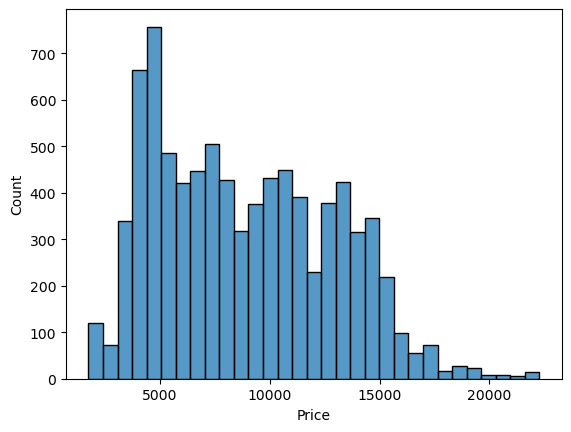

In [37]:
# Plot a histogram of flight prices
sns.histplot(data=planes, x="Price")
plt.show()

After removing outliers, flight prices are less skewed and look more like a normal distribution.

## 3. Relationships in Data

### Patterns over time

**Example code from video:**
```python
# Import csv file and interpret "marriage_date" as DateTime data
divorce = pd.read_csv("datasets/divorce.csv", parse_dates=["marriage_date"])

# Convert to DataTime data after csv file has been imported
divorce["marriage_date"] = pd.to_datetime(divorce["marriage_date"])

# Combine separate columns into a single DateTime column
divorce["marriage_date"] = pd.to_datetime(divorce[["month","day","year"]])

# Extract just the month from a column containing a full date
divorce["marriage_month"] = divorce["marriage_date"].dt.month

# Create a line plot to examine relationships between variables
sns.lineplot(data=divorce, x="marriage_month", y="marriage_duration")
plt.show()

#### _Importing DateTime data_

In [38]:
''' The "divorce.csv" dataset describes Mexican marriages dissolved between 2005 and 2015. 
Convert all the date information to a DateTime data type. '''

# Preview the column names and data types
divorce.dtypes

divorce_date          object
dob_man               object
education_man         object
income_man           float64
dob_woman             object
education_woman       object
income_woman         float64
marriage_date         object
marriage_duration    float64
num_kids             float64
dtype: object

In [39]:
# Import "divorce.csv", parsing the appropriate columns as dates
divorce = pd.read_csv("datasets/divorce.csv",\
                      parse_dates=["divorce_date", "dob_man", "dob_woman"])

divorce.dtypes

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date                object
marriage_duration           float64
num_kids                    float64
dtype: object

#### _Updating data type to DateTime_

In [40]:
''' Convert the "marriage_date" column to DataTime data as it was not done in the  
previous exercise. '''
divorce["marriage_date"] = pd.to_datetime(divorce["marriage_date"])

divorce.dtypes

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object

#### _Visualizing relationships over time_

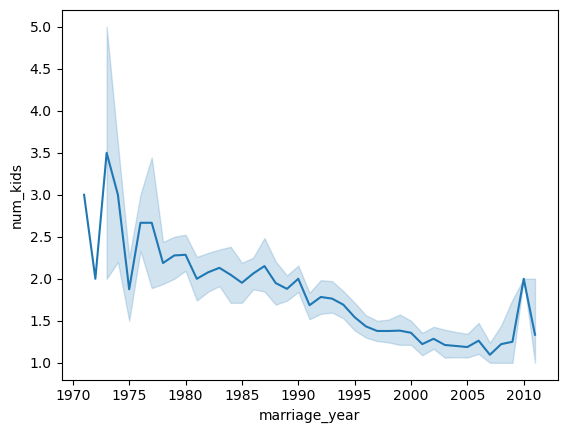

In [41]:
''' Does the year that the couple got married have a relationship with the number of  
children that the couple has at the time of divorce? '''

# Define a "marriage_year" column containing the year portion of the "marriage_date"
divorce["marriage_year"] = divorce["marriage_date"].dt.year

# Create a line plot showing the average number of kids by year
sns.lineplot(data=divorce, x="marriage_year", y="num_kids")
plt.show()

It looks like couples who had later marriage years also had fewer children during their  
marriage.

### Correlation

**Example code from video:**
```python
# To see the pairwise correlation of numerical variables in a DataFrame
divorce.corr()  # calculates the Pearson correlation coefficient

# Visualize .corr() results and label each cell
sns.heatmap(divorce.corr(), annot=True)
plt.show

# Plot all pairwise relationships between numerical variables in one visualization
sns.pairplot(data=divorce)
plt.show()

# Limit the number of plotted relationships to variables of interest
sns.pairplot(data=divorce, vars=["income_man", "income_woman", "marriage_duration"])
plt.show()

#### _Visualizing variable relationships_

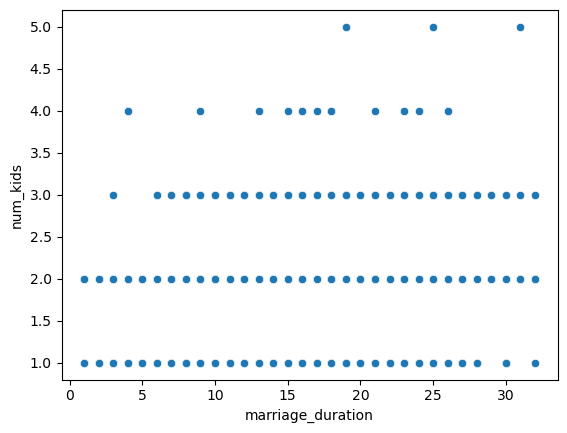

In [42]:
''' Create a scatter plot to visualize the relationship between "marriage_duration"  
and "num_kids". '''

sns.scatterplot(data=divorce, x="marriage_duration", y="num_kids")
plt.show()

The scatterplot shows a slight positive relationship. In the dataset, couples with no children  
have no value in the `num_kids` column.

If we are confident that all or most of the missing values in `num_kids` are related to couples  
without children, we could update these values to 0, which might increase the correlation.

#### _Visualizing multiple variable relationships_

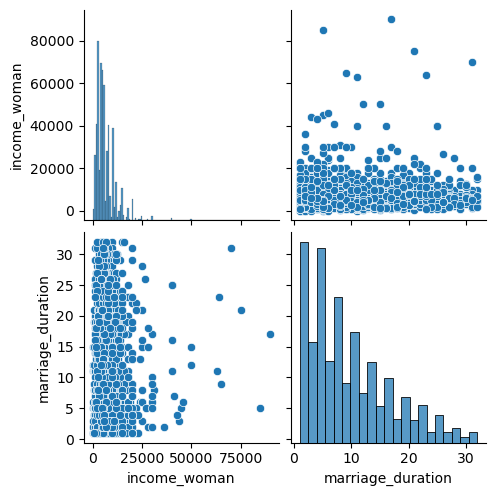

In [43]:
''' Use a pairplot to compare relationships between variables. '''

# Create a pairplot for "income_woman" and "marriage_duration"
sns.pairplot(data=divorce, vars=["income_woman", "marriage_duration"])
plt.show()

The relationship between `income_woman` and `marriage_duration` is not a strong one.  
The distribution of both variables is shown in the upper left and lower right plots.

### Factor relationships and distributions

#### _Categorical data in scatter plots_

In [44]:
divorce.dtypes

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
marriage_year                 int32
dtype: object

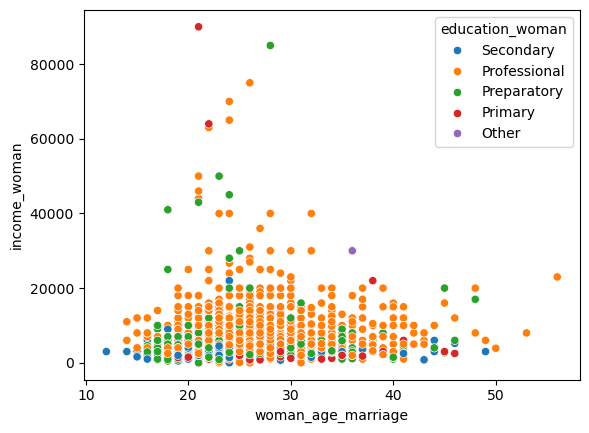

In [45]:
''' Create a scatter plot of each woman's age and income, layering in the categorical  
variable of education level for additional context. '''

# Define a column of the woman's age at time of marriage
divorce["woman_age_marriage"] = divorce["marriage_year"] - divorce["dob_woman"].dt.year

# Create the scatter plot
sns.scatterplot(data=divorce, x="woman_age_marriage", y="income_woman", hue="education_woman")
plt.show()

There is a positive correlation between professional education and higher salaries, as might  
be expected. The relationship between women's age at marriage and education level is a little  
less clear.

#### _Exploring with KDE plots_

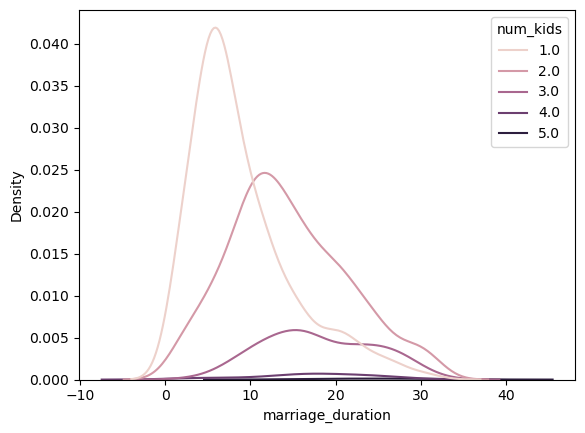

In [46]:
''' Kernel Density Estimate (KDE) plots are a great alternative to histograms when  
showing multiple distributions in the same visual. Plot the relationship between marriage  
duration and the number of kids that a couple has. '''

sns.kdeplot(data=divorce, x="marriage_duration", hue="num_kids")
plt.show()

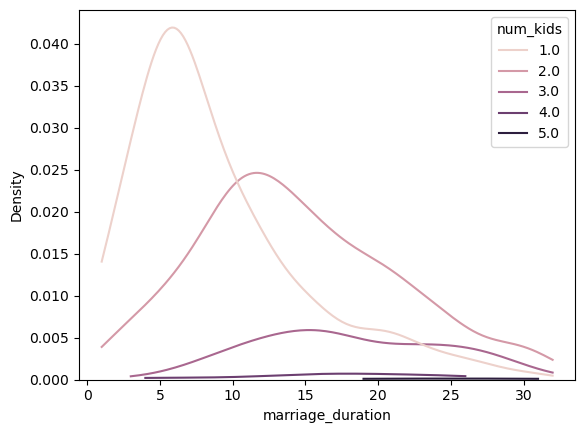

In [47]:
''' Notice that the plot currently shows marriage durations less than zero due to the 
smoothing algorithm used in KDE plots. Update the plot so that marriage duration cannot   
be smoothed past the extreme data points. '''

sns.kdeplot(data=divorce, x="marriage_duration", hue="num_kids", cut=0)
plt.show()

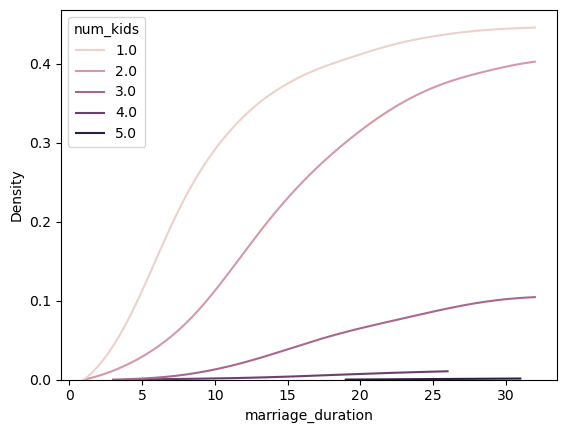

In [48]:
''' Update the plot to show a cumulative distribution function for each number of  
children a couple has. '''

sns.kdeplot(data=divorce, x="marriage_duration", hue="num_kids", cut=0, cumulative=True)
plt.show()

**Note:** The cumulative KDE plot describes the probability that the marriage duration is less  
than or equal to the value on the x-axis for each number of children a couple has.

It looks as though there is a positive correlation between longer marriages and more children,   
but this doesn't indicate causation. 

There is also much less data on couples with more than two children. This helps us understand  
how reliable our findings are.

## 4. Turning Exploratory Analysis into Action

### Considerations for categorical data

#### _Checking for class imbalance_

In [49]:
''' Find the relative frequency of the "Destination" column from "planes" 
DataFrame. '''

planes["Destination"].value_counts(normalize=True)

Destination
Cochin       0.428893
Banglore     0.271391
Delhi        0.118274
New Delhi    0.079284
Hyderabad    0.065892
Kolkata      0.036265
Name: proportion, dtype: float64

Given the difference in relative frequencies, can the `planes` DataFrame be trusted to  
accurately represent flight destinations?

#### _Cross-tabulation_

Cross-tabulation can help identify how observations occur in combination.

In [50]:
# Cross-tabulate "Source" and "Destination" using the "planes" dataset
pd.crosstab(planes["Source"], planes["Destination"])

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,0,0,998,0,0,669
Chennai,0,0,0,0,306,0
Delhi,0,3619,0,0,0,0
Kolkata,2290,0,0,0,0,0
Mumbai,0,0,0,556,0,0


In [51]:
# Cross-tabulate to return the median price of flights
pd.crosstab(planes["Source"], planes["Destination"],
            values=planes["Price"], aggfunc="median")

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,NaN,NaN,4823.0,NaN,NaN,10008.0
Chennai,NaN,NaN,NaN,NaN,3850.0,NaN
Delhi,NaN,10262.0,NaN,NaN,NaN,NaN
Kolkata,9345.0,NaN,NaN,NaN,NaN,NaN
Mumbai,NaN,NaN,NaN,3625.0,NaN,NaN


### Generating new features

#### _Extracting features for correlation_

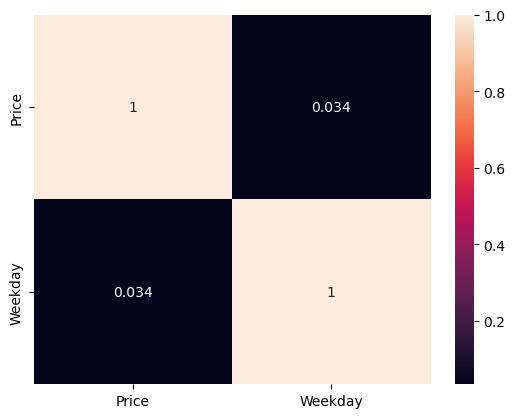

In [52]:
''' Extract datetime attributes and then create a heat map to visualize the correlation  
coefficients between variables. '''

# Extract the weekday from "Date_of_Journey"
planes["Weekday"] = planes["Date_of_Journey"].dt.weekday

# Plot a heat map 
sns.heatmap(planes[["Price", "Weekday"]].corr(), annot=True)
plt.show()

The plot shows a weak correlation between flight prices and weekday of flights.

#### _Calculating salary percentiles_

In [53]:
''' The conversion of numeric data into categories sometimes makes it easier to identify  
patterns. Convert the "Salary_USD" column into categories based on its percentiles. '''

# Find the 25th percentile
twenty_fifth = salaries["Salary_USD"].quantile(0.25)

#  Find the median
salaries_median = salaries["Salary_USD"].median()

# Find the 75th percentile
seventy_fifth = salaries["Salary_USD"].quantile(0.75)

#### _Categorizing salaries_

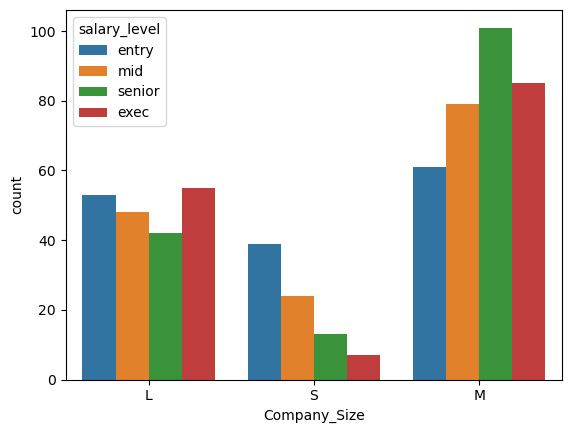

In [54]:
''' Use the variables created in the previous exercise to split salaries into different  
labels and add a new "salary_level" column. '''

# Create salary labels
salary_labels = ["entry", "mid", "senior", "exec"]

# Create the salary ranges list
salary_ranges = [0, twenty_fifth, salaries_median, seventy_fifth, 
                 salaries["Salary_USD"].max()]

# Split "Salary_USD" based on the labels and ranges
salaries["salary_level"] = pd.cut(salaries["Salary_USD"], bins=salary_ranges,
                                  labels=salary_labels)

# Plot the count of salary levels at companies of different sizes
sns.countplot(data=salaries, x="Company_Size", hue="salary_level")
plt.show()

### Generating hypotheses

In [55]:
''' Exploratory data analysis is a crucial step in generating hypotheses. Explore the idea  
that data professionals get paid more in the USA than they do in Great Britain. '''

# Filter for employees in the US or GB
usa_and_gb = salaries[(salaries["Employee_Location"] == "US") | 
                      (salaries["Employee_Location"] == "GB")]

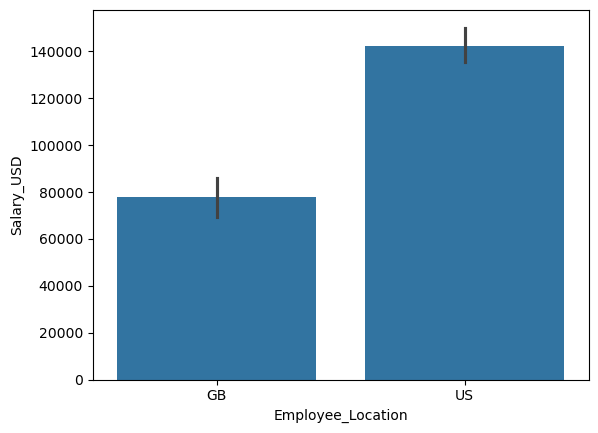

In [56]:
# Creat a barplot
sns.barplot(data=usa_and_gb, x="Employee_Location", y="Salary_USD")
plt.show()

The visualization suggests a hypothesis that is worth formally investigating to determine  
whether a real difference exists or not.

<div style="text-align: center; font-size: 18px; font-weight: bold; color: #F5DEB3;">
<span>[ End of notebook ]</span>
</div>